<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [5]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [6]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [152]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [97]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [98]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [99]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [100]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


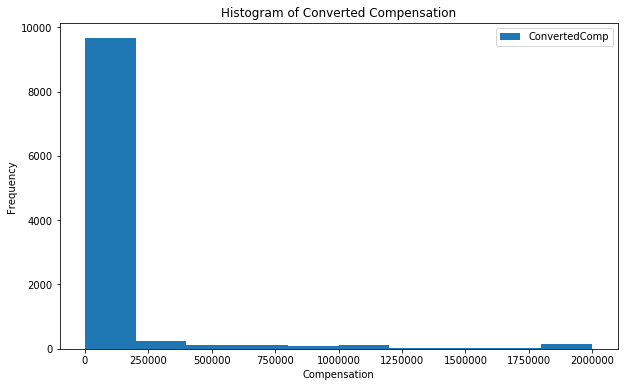

In [102]:
# SQL query
QUERY = """
SELECT ConvertedComp
FROM master;
"""

df = pd.read_sql_query(QUERY,conn) # Initialise dataframe

# Create the histogram
df.plot(kind='hist', figsize=(10,6))

plt.title('Histogram of Converted Compensation')
plt.xlabel('Compensation')

plt.show()

### Box Plots


Plot a box plot of `Age.`


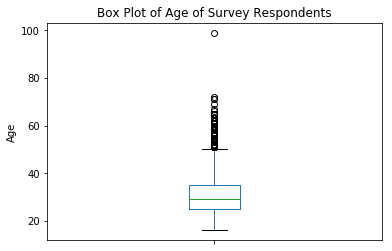

In [112]:
# SQL query
QUERY = """
SELECT Age AS 'Respondent Age'
FROM master;
"""

df = pd.read_sql_query(QUERY,conn) # Initialise dataframe

# Create the box plot
df.plot(kind='box')

plt.title('Box Plot of Age of Survey Respondents')
plt.ylabel('Age')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    labelbottom=False) # labels along the bottom edge are off

plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


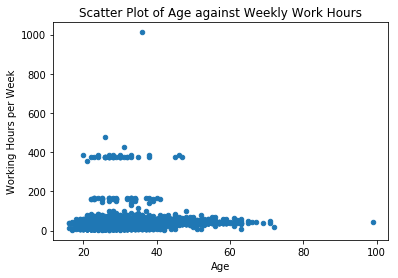

In [63]:
# SQL query
QUERY = """
SELECT Age, WorkWeekHrs
FROM master;
"""

df = pd.read_sql_query(QUERY,conn) # Initialise dataframe

# Create the scatter plot
df.plot('Age', 'WorkWeekHrs', kind='scatter')

plt.title('Scatter Plot of Age against Weekly Work Hours')
plt.ylabel('Working Hours per Week')
plt.xlabel('Age')

plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


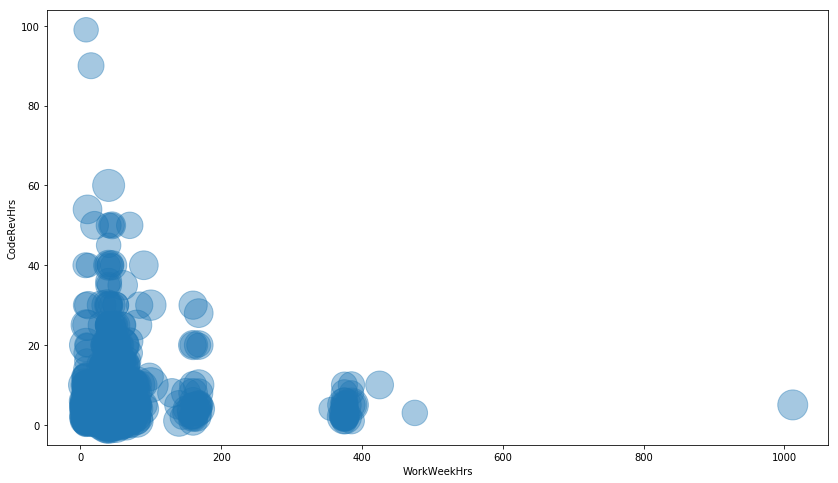

In [116]:
# SQL query
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master;
"""

df = pd.read_sql_query(QUERY,conn) # Initialise dataframe

Age_norm = df['Age'] * 25 + 1 # Adjust the values for bubble size

# Create the bubble plot
df.plot(kind='scatter', 
            x='WorkWeekHrs',
            y='CodeRevHrs',
            s=Age_norm,
            alpha=0.4,
            figsize=(14, 8))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


[0 1 2 3 4]


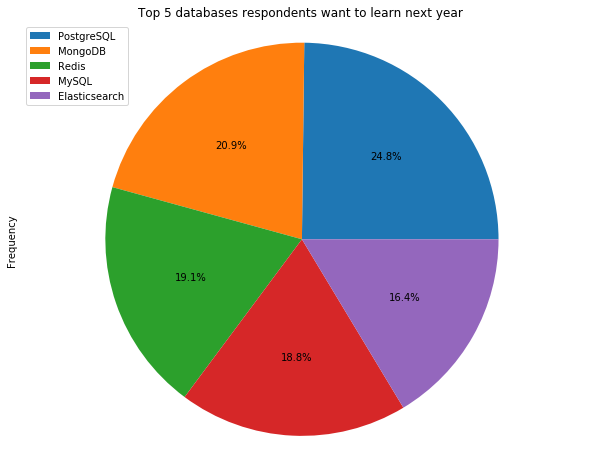

In [146]:
# SQL query
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) AS Frequency
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Frequency DESC
LIMIT 5;
"""

df = pd.read_sql_query(QUERY,conn) # Initialise dataframe
print(df.index.values)

#df_pie = df.groupby('DatabaseDesireNextYear', axis=0).sum() # Group the DatabaseDesireNextYear values and sum
#df_pie = df_pie.sort_values('Respondent', ascending=False).head() # Sort the values from highest to lowest, and select the top 5

# Create the pie chart
df.plot(kind='pie',
        x="DatabaseDesireNextYear",
        y="Frequency",
        figsize=(10, 8),
        labels=None, # Remove labels from segments
        autopct='%1.1f%%', # add in percentages 
        )

plt.title('Top 5 databases respondents want to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

# add legend
plt.legend(labels=df['DatabaseDesireNextYear'].values, loc='upper left')

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0.5,0,'Age of Respondents')

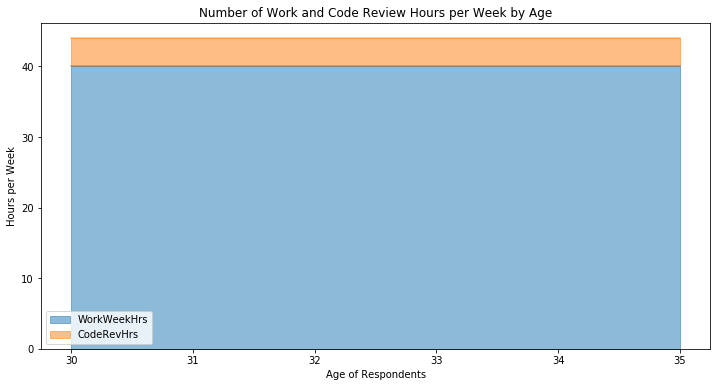

In [148]:
# SQL query
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age >= 30 AND Age <= 35;
"""

df = pd.read_sql_query(QUERY,conn) # Initialise dataframe
df['Age'] = df['Age'].astype('int32') # Convert Age values to integers

df_stacked = df.groupby('Age', axis=0).median() # Group the Age values and calculate median

# Create the stacked line chart
ax = df_stacked.plot(kind='area', alpha=0.5, figsize=(12, 6))

ax.set_title('Number of Work and Code Review Hours per Week by Age')
ax.set_ylabel('Hours per Week')
ax.set_xlabel('Age of Respondents')


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


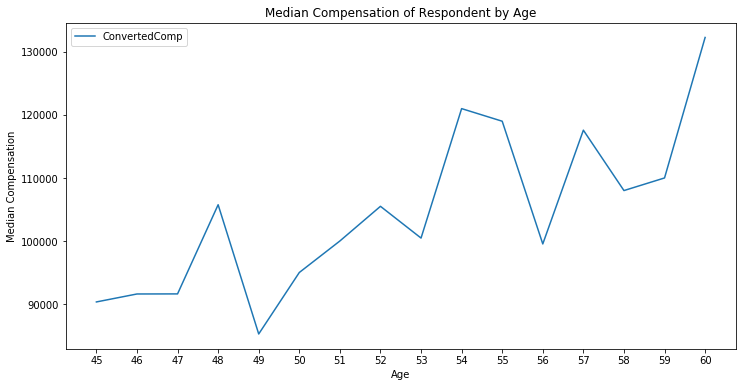

In [166]:
# SQL query
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age >= 45 AND Age <= 60
"""

df = pd.read_sql_query(QUERY,conn) # Initialise dataframe
df['Age'] = df['Age'].astype('int32') # Convert Age values to integers

df_line = df.groupby('Age', axis=0).median() # Group the Age values and calculate median

# Create the line chart
fig = df_line.plot(kind='line', figsize=(12, 6), title='Median Compensation of Respondent by Age')
fig.set_ylabel('Median Compensation')
fig.set_xticks(list(range(min(df['Age']), max(df['Age']) + 1))) # x-axis tick mark interval of 1


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0.5,0,'Number of Respondents')

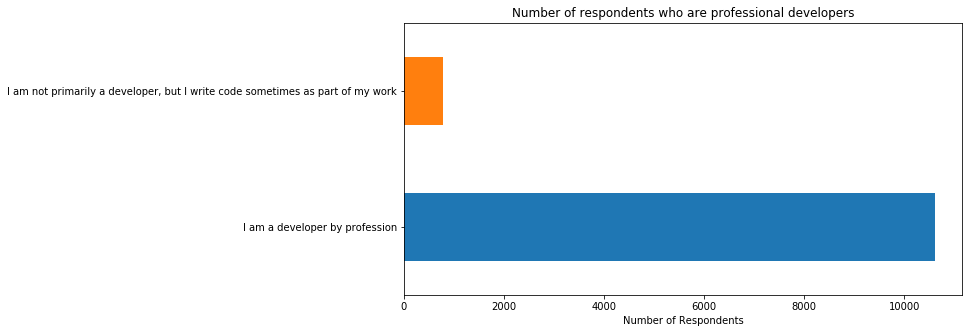

In [173]:
# SQL query
QUERY = """
SELECT MainBranch
FROM master
"""

df = pd.read_sql_query(QUERY,conn) # Initialise dataframe

#df_bar = df.groupby('MainBranch', axis=0).sum() # Group the MainBranch values and sum

df_bar = pd.get_dummies(df['MainBranch']).sum()

# Create the line chart
fig = df_bar.plot(kind='barh', 
                  figsize=(10, 5), 
                  title='Number of respondents who are professional developers'
                  )
fig.set_xlabel('Number of Respondents')

Close the database connection.


In [174]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
